In [327]:
# Import Pandas, Numpy, Matplotlib and Seaborn
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Import Label Encoder, One Hot Encoder, train_test_split, Min Max Scaler,
# Make Pipeline, Mean Squared Error, Mean Absolute Error, R2 Score, Cross Validation Score and Grid Search
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Import Linear Regression, Ridge Classifier, Decision Tree
# MLP Classifier, Random Forest and Support Vector Classifier models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR





In [328]:
# Read the "insurance.csv" file
dataset = pd.read_csv("/content/insurance.csv")

In [329]:
# Use the head() function to display the first 5 rows of the data
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


15.96
53.13


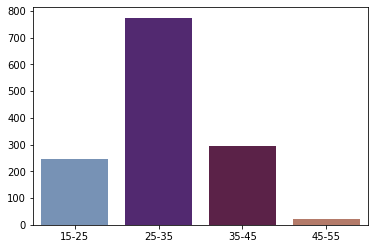

In [330]:
# Examine the distribution of Bmi (Body Mass Index)
bmis = dataset["bmi"]

list1 = []
list2 = []
list3 = []
list4 = []
list5 = []

for i in bmis:
  list1.append(i)
print(min(list1)) 
print(max(list1))
for i in list1:
  if 15<i<=25:
    list2.append(i)
  elif 25<i<=35:
    list3.append(i)  
  elif 35<i<=45:
    list4.append(i)  
  elif 45<i<=55:
    list5.append(i) 
sns.barplot(x=["15-25", "25-35", "35-45","45-55"],y=[len(list2), len(list3), len(list4), len(list5)],palette="twilight")
plt.show()

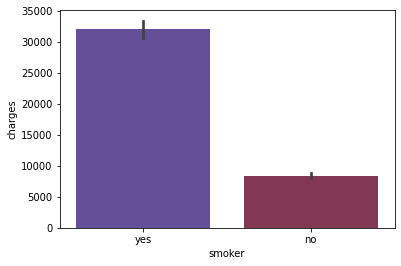

In [331]:
# Examine the relationship between “smoker” and “charges”
sns.barplot(x=dataset.smoker,y=dataset.charges,palette="twilight")
plt.show()

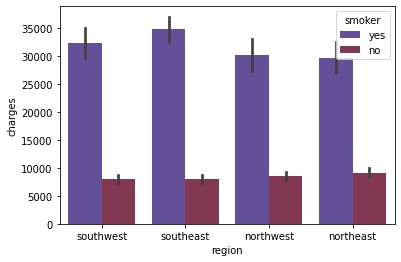

In [332]:
# Examine the relationship between “smoker” and “region”
sns.barplot(x=dataset.region,y=dataset.charges,hue=dataset.smoker,palette='twilight')
plt.show()

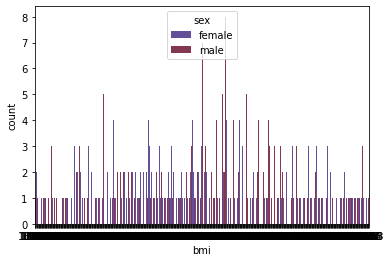

In [333]:
# Examine the relationship between “bmi” and “sex”
sns.countplot(x=dataset.bmi, hue=dataset.sex, palette='twilight')
plt.show()

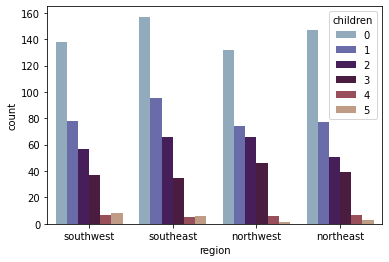

In [334]:
# Find the "region" with the most "children".
sns.countplot(x=dataset.region, hue=dataset.children, palette='twilight')
plt.show()

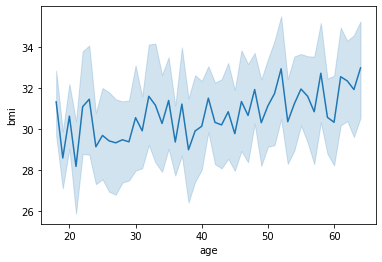

In [335]:
# Examine the relationship between “age” and “bmi”
sns.lineplot(x=dataset.age, y=dataset.bmi, palette='twilight')
plt.show()

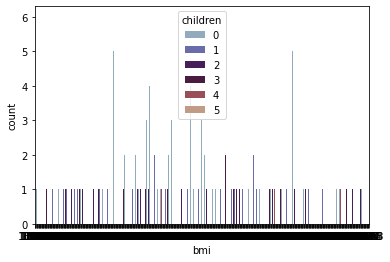

In [336]:
# Examine the relationship between “bmi” and “children”
sns.countplot(x=dataset.bmi, hue=dataset.children, palette='twilight')
plt.show()  


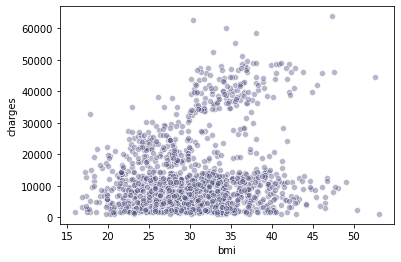

In [337]:
# Examine the relationship between “bmi” and “charges”.
sns.scatterplot(x=dataset.bmi, y=dataset.charges, color=(0.3, 0.3, 0.5, 0.4))
plt.show()

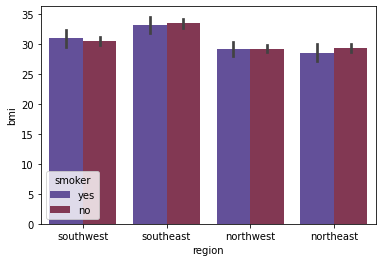

In [338]:
# Examine the relationship between “region”, “smoker” and “bmi” using bar plot
sns.barplot(x=dataset.region,y=dataset.bmi, hue=dataset.smoker, palette='twilight')
plt.show()

In [339]:
# Checking for the labels in the "region", "sex" and "smoker" columns
print(dataset['region'].unique())
print(dataset['sex'].unique())
print(dataset['smoker'].unique())

['southwest' 'southeast' 'northwest' 'northeast']
['female' 'male']
['yes' 'no']


In [340]:
# Checking for the label counts in the "region", "sex" and "smoker" columns
print(dataset['region'].value_counts())
print(dataset['sex'].value_counts())
print(dataset['smoker'].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64


In [341]:
# Create an LabelEncoder object
labelencoder = LabelEncoder()

# Create transform function for the "sex" and "smoker" column
def transform(columnname):
   dataset[columnname] = labelencoder.fit_transform(dataset[columnname].values) 



In [342]:
# One-Hot encoding the "region", "sex", "smoker" and "children" columns using get_dummies() 
dataset = pd.get_dummies(dataset, columns = ['region', 'sex', 'smoker', 'children'])

In [343]:
# Create the X variable for features
X = dataset.drop("charges", axis = 1)

# Create the y variable for output labels
y = dataset.loc[:, "charges"]

In [344]:
# Print both X and y to see the final data
# Print X
print(X)

      age     bmi  region_northeast  region_northwest  region_southeast  \
0      19  27.900                 0                 0                 0   
1      18  33.770                 0                 0                 1   
2      28  33.000                 0                 0                 1   
3      33  22.705                 0                 1                 0   
4      32  28.880                 0                 1                 0   
...   ...     ...               ...               ...               ...   
1333   50  30.970                 0                 1                 0   
1334   18  31.920                 1                 0                 0   
1335   18  36.850                 0                 0                 1   
1336   21  25.800                 0                 0                 0   
1337   61  29.070                 0                 1                 0   

      region_southwest  sex_female  sex_male  smoker_no  smoker_yes  \
0                    1      

In [345]:
# Print y
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [346]:
# Create an Scaler object
scaler = StandardScaler()

# Scale features
X = scaler.fit_transform(X)

# Print scaled features 
print(X)

[[-1.43876426 -0.45332    -0.56526686 ... -0.3646069  -0.13798683
  -0.11677484]
 [-1.50996545  0.5096211  -0.56526686 ... -0.3646069  -0.13798683
  -0.11677484]
 [-0.79795355  0.38330685 -0.56526686 ...  2.74267989 -0.13798683
  -0.11677484]
 ...
 [-1.50996545  1.0148781  -0.56526686 ... -0.3646069  -0.13798683
  -0.11677484]
 [-1.29636188 -0.79781341 -0.56526686 ... -0.3646069  -0.13798683
  -0.11677484]
 [ 1.55168573 -0.26138796 -0.56526686 ... -0.3646069  -0.13798683
  -0.11677484]]


In [347]:
# Split the dataset into train and test sets with 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [348]:
# Create an object using the LinearRegression() class
LR = LinearRegression()

# Create an object using the Ridge() class
Rid = Ridge()

# Create an object using the DecisionTreeRegressor() class
DTR = DecisionTreeRegressor()

# Create an object using the MLPregressor() class
MLP = MLPRegressor()

# Create an object using the RandomForestRegressor() class
RFR = RandomForestRegressor()

# Create an object using the SVR() class
SV = SVR()

In [349]:
# Train the Linear Regression model
LR.fit(X_train,y_train)

# Train the Ridge Regression model
Rid.fit(X_train,y_train)

# Train the Decision Tree Regression model
DTR.fit(X_train,y_train)

# Train the MLP Regression model
MLP.fit(X_train,y_train)

# Train the Random Forest Regression model
RFR.fit(X_train,y_train)

# Train the Support Vector Regression model
SV.fit(X_train,y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


SVR()

In [350]:
# Make prediction using the train dataset on Linear Regression model
trainpredictionsLR = LR.predict(X_train)

# Make prediction using the train dataset on Ridge Regression model
trainpredictionsRid = Rid.predict(X_train)

# Make prediction using the train dataset on Decision Tree Regression model
trainpredictionsDTR = DTR.predict(X_train)

# Make prediction using the train dataset on MLP Regression model
trainpredictionsMLP = MLP.predict(X_train)

# Make prediction using the train dataset on Random Forest Regression model
trainpredictionsRFR = RFR.predict(X_train)

# Make prediction using the train dataset on Support Vector Regression model
trainpredictionsSV = SV.predict(X_train)

In [351]:
# Make prediction using the test dataset on Linear Regression model
predictionsLR = LR.predict(X_test)

# Make prediction using the test dataset on Ridge Regression model
predictionsRid = Rid.predict(X_test)

# Make prediction using the test dataset on Decision Tree Regression model
predictionsDTR = DTR.predict(X_test)

# Make prediction using the test dataset on MLP Regression model
predictionsMLP = MLP.predict(X_test)

# Make prediction using the test dataset on Random Forest Regression model
predictionsRFR = RFR.predict(X_test)

# Make prediction using the test dataset on Support Vector Regression model
predictionsSV = SV.predict(X_test)

In [352]:
# Print cross validation score for Linear Regression model
scoreLR = cross_val_score(LR, X, y, cv=5)
print('Linear Regression score :', scoreLR)

# Print cross validation score for Ridge Regression model
scoreRid = cross_val_score(Rid, X, y, cv=5)
print('Ridge Regression score :', scoreRid)

# Print cross validation score for Decision Tree Regression model
scoreDTR = cross_val_score(DTR, X, y, cv=5)
print('Decision Tree Regression score :', scoreDTR)

# Print cross validation score for MLP Regression model
scoreMLP = cross_val_score(MLP, X, y, cv=5)
print('MLP Regression score :', scoreMLP)

# Print cross validation score for Random Forest Regression model
scoreRFR = cross_val_score(RFR, X, y, cv=5)
print('Random Forest Regression score :', scoreRFR)

# Print cross validation score for Support Vector Regression model
scoreSV = cross_val_score(SV, X, y, cv=5)
print('Support Vector Regression score :', scoreSV)

Linear Regression score : [0.75934538 0.7062713  0.78010408 0.73368933 0.75228635]
Ridge Regression score : [0.76027039 0.70617265 0.77823585 0.73393791 0.75273179]
Decision Tree Regression score : [0.72816941 0.65580681 0.71528262 0.68047013 0.71335375]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

MLP Regression score : [-1.01766174 -1.11635891 -0.95774864 -1.04213102 -1.00506365]
Random Forest Regression score : [0.85344178 0.7747911  0.86757733 0.82307354 0.85178128]
Support Vector Regression score : [-0.11081627 -0.1096904  -0.07801234 -0.10281253 -0.10329426]


In [353]:
# Create the parameter grid for GridSearchCV
parameters = {"n_estimators": [200,500,1000],
                "max_features": ["auto"],
                "max_depth": [8,10,12],
                "min_samples_split": [10,12,14,16],
                "min_samples_leaf": [2,4,6],
                "bootstrap": [True]}

# Instantiate a Random Forest Regressor
RFR = RandomForestRegressor(random_state=42)

# Setup grid search
RFgrid = GridSearchCV(estimator = RFR, param_grid = parameters, cv=5, verbose=2)

# Train the grid search model on training dataset
RFgrid.fit(X_train, y_train)

# Get best RF estimator based on best parameters, and use RF regressor to predict on test set
best_est = RFgrid.best_estimator_
y_pred_test = best_est.predict(X_test)



Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   1.0s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=500; tota

In [354]:
# Print the R2 Score for Random Forest Regression model
test_score = r2_score(y_test, y_pred_test)
print('Random Forest Regression testing R2 score :', test_score)

# Print the mean absolute error for Random Forest Regression model
print('Random Forest Regression mean absolute error:', mean_absolute_error(y_test, y_pred_test))

# Print the mean squared error for Random Forest Regression model
print('Random Forest Regression mean squared error:', mean_squared_error(y_test, y_pred_test))





Random Forest Regression testing R2 score : 0.8919160002975978
Random Forest Regression mean absolute error: 2246.7210754875273
Random Forest Regression mean squared error: 15532454.471895708
